<a href="https://colab.research.google.com/github/arssite/Ghackk-Technologies/blob/main/Task_3_chatbot_Answer_from_%E2%80%9CCastle_Swimmer_Chapter_83_89_Unveiling_New_Prophecy%E2%80%9D_Article.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Task 3
The objective of this task is to develop a basic chatbot that interacts with users by providing informative responses about the webcomic "Castle Swimmer," specifically focusing on chapters 83 to 89.

The chatbot should be capable of:

~ Answering general questions about the webcomic, including its themes and main characters.

~ Greeting users appropriately and engaging them in conversation.

~ Dynamically extracting and listing character names from the content of the specified article to enhance user experience.

~ Utilizing natural language processing techniques to understand user input and provide relevant responses.

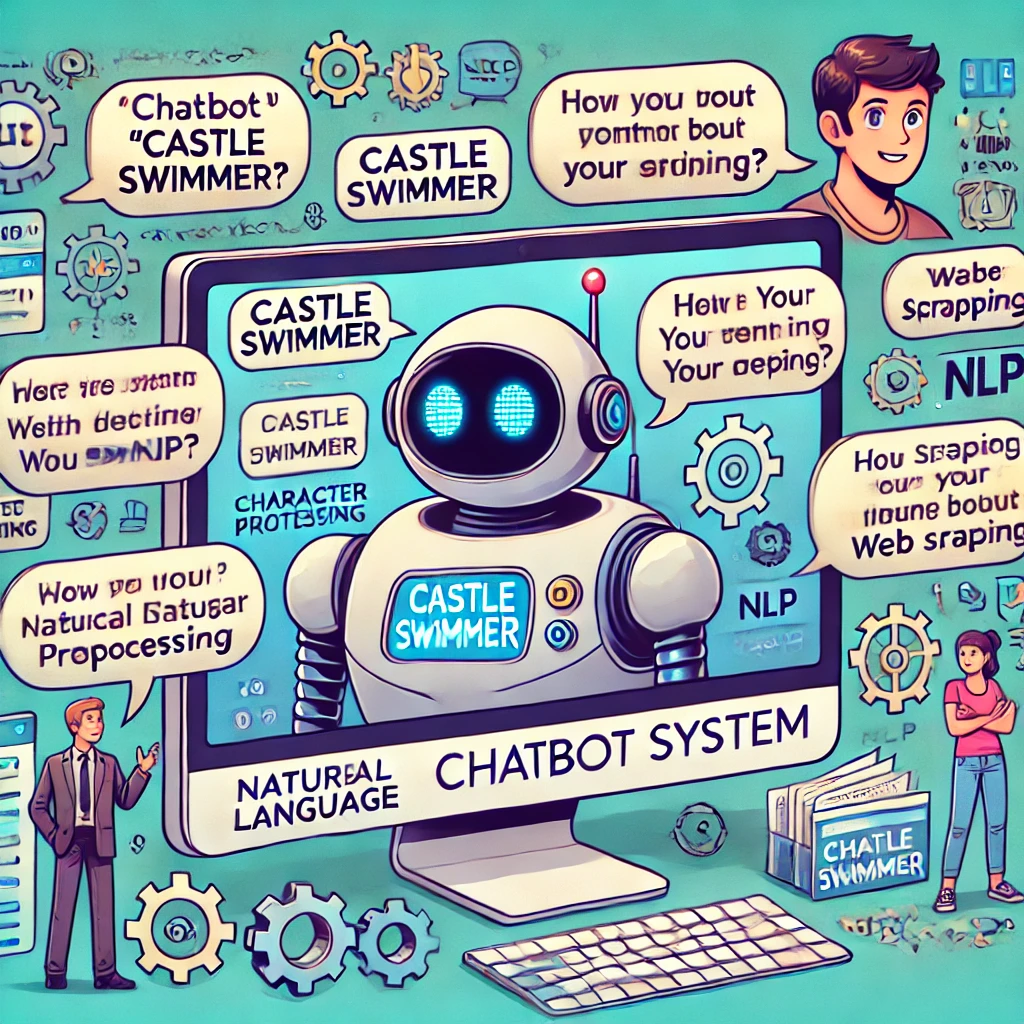

## Solution Approach

The solution follows a systematic approach to achieve the objectives:

### 1. Content Retrieval

- The chatbot fetches the article's content from the URL [Castle Swimmer: Unveiling New Prophecy](https://animemangatoon.com/castle-swimmer-unveiling-new-prophecy/) using the `requests` library.
- The HTML content is parsed with `BeautifulSoup` to extract relevant paragraphs containing information about the webcomic.

### 2. Character Name Extraction

- A function (`fetch_character_names`) is implemented to scan the extracted content for character names.
- This involves using regular expressions to identify capitalized names or specific patterns that likely indicate character names.

### 3. Natural Language Processing (NLP)

- The `nltk` library is utilized to tokenize user input for keyword-based responses.
- The `SentenceTransformer` model (`all-MiniLM-L6-v2`) from Hugging Face is employed to calculate semantic similarity between user queries and the content, providing nuanced responses for questions that are not explicitly predefined.

### 4. Keyword-Based Responses

- The chatbot recognizes specific keywords and responds with pre-defined answers for common inquiries about the webcomic, such as:
  - **"What is Castle Swimmer about?"**
  - **"Who are the main characters?"**

### 5. Greeting and Interaction

- The chatbot identifies greetings in user input and responds appropriately, enhancing user engagement and making the interaction feel more natural.

### 6. Main Loop

- The chatbot operates in a loop, continuously accepting user input and providing responses until the user decides to exit by typing **"quit."**


#Installing Libaries

In [ ]:
pip install requests beautifulsoup4 nltk sentence-transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 245.3/245.3 kB 9.2 MB/s eta 0:00:00


#Importing Libaries

In [ ]:
import requests
from bs4 import BeautifulSoup
import nltk
from sentence_transformers import SentenceTransformer, util
import numpy as np
import re


# Fetching content from the URL
Extracting text from the relevant parts of the webpage

In [ ]:
def fetch_content(url):
    response=requests.get(url)
    soup=BeautifulSoup(response.content, 'html.parser')
    content=[]
    for paragraph in soup.find_all('p'):
        content.append(paragraph.get_text())
    return content

# Fetching character names from the content
Assuming character names are listed in a specific way in the text.

This is a simple extraction. Adjust based on actual structure.

Look for sentences that might contain character names

Extract names (you can improve this regex based on how names are presented)

In [ ]:
def fetch_character_names(content):
    characters = set()
    for paragraph in content:
        if "character" in paragraph.lower():
            names = re.findall(r'([A-Z][a-z]+(?: [A-Z][a-z]+)*)', paragraph)
            characters.update(names)
    return list(characters)

# Function to get the best response based on semantic similarity or keywords
Calculate cosine similarities

In [ ]:

def get_response(user_input, content, character_names):
    user_input = user_input.lower()
    tokens = nltk.word_tokenize(user_input)
    greetings = ['hello', 'hi', 'hey', 'greetings', 'good morning', 'good evening']
    if any(greet in user_input for greet in greetings):
        return "Hello! I'm the Castle Swimmer Chatbot. Ask me anything about Castle Swimmer!"
    if any(re.search(r'\babout\b', token) for token in tokens):
        return "Castle Swimmer is a fantasy webcomic that follows the journey of a swimmer navigating through a mystical underwater world filled with diverse characters and challenges."
    elif any(re.search(r'\bmain characters\b', token) for token in tokens) or any(re.search(r'\bcharacters\b', token) for token in tokens):
        return f"The main characters include: {', '.join(character_names)}."
    elif any(re.search(r'\bthemes\b', token) for token in tokens):
        return "The story explores themes of friendship, adventure, and self-discovery."
    elif any(re.search(r'\bprophecy\b', token) for token in tokens):
        return "In chapters 83-89, a new prophecy is revealed that hints at upcoming challenges and the fate of the characters."
    user_input_embedding = model.encode(user_input, convert_to_tensor=True)
    content_embeddings = model.encode(content, convert_to_tensor=True)
    similarities = util.cos_sim(user_input_embedding, content_embeddings)
    similarities_cpu = similarities.cpu().numpy()
    most_similar_idx = np.argmax(similarities_cpu)
    return content[most_similar_idx]

ChatBot

In [ ]:
def chatbot():
    print("Welcome to the Castle Swimmer Chatbot! Ask me anything about Castle Swimmer (type 'quit' to exit).")
    while True:
        user_input = input("You: ")
        if user_input.lower() == "quit" or user_input.lower()=="thanks":
            print("Chatbot: Goodbye!")
            break
        response = get_response(user_input, content, character_names)
        print(f"Chatbot: {response}")



Use Model for Semantic

In [ ]:
model = SentenceTransformer('all-MiniLM-L6-v2')
url = "https://animemangatoon.com/castle-swimmer-unveiling-new-prophecy/"
content = fetch_content(url)
character_names = fetch_character_names(content)
nltk.download('punkt')
chatbot()

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Welcome to the Castle Swimmer Chatbot! Ask me anything about Castle Swimmer (type 'quit' to exit).
You: good Evening
Chatbot: Hello! I'm the Castle Swimmer Chatbot. Ask me anything about Castle Swimmer!
You: “What is Castle Swimmer about?
Chatbot: Castle Swimmer is a fantasy webcomic that follows the journey of a swimmer navigating through a mystical underwater world filled with diverse characters and challenges.
You: who is castle
Chatbot: As he follows it, Kappa’s path leads him to an enigmatic castle from his past. Though the castle appears empty for many years, he is fearful because this place does not suit any prophecy. Sensing his distress, the Evil Queen questions him about its history. After getting no response, she decides they should leave. However, as they prepare to leave, Mono spots what seems to be a person hiding behind one of the trees and uses her magic power to capture this figure, revealing Queen Nee.  
You: main characters
Chatbot: The main characters include: Castl